# Пример, Kanji, критерий 1

Линия по производству пудры должна обеспечивать средний вес пудры в
упаковке 4 грамма, заявленное стандартное отклонение — 1 грамм.
В ходе инспекции выбрано 9 упаковок, средний вес продукта в них составляет
4.6 грамма.

$H_0$: средний вес пудры в упаковке соответствует норме.

$H_1$: средний вес пудры в упаковке не соответствует норме.

```p=0.0719```

In [4]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

Проверим критерий "вручную":

$Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}.$

$p(Z) = 2 \bigl(1-F(|Z|)\bigr).$

In [ ]:
mu = 4
std = 1
n = 9
mean = 4.6

In [ ]:
Z = # ваш код
Z

In [ ]:
def F(Z):
    return st.distributions.norm.cdf(Z)
p = # ваш код
p

Просэмплируем похожую выборку и проверим критерий с использованием библиотеки ```statsmodels```

In [ ]:
rs = np.random.RandomState(5)
X = rs.randn(n) * std + 4.3
np.mean(X), np.std(X)

In [ ]:
from statsmodels.stats.weightstats import ztest
ztest(X, value=mu)

# Кобзарь, задача 227

Нормируемый уровень дефектных изделий в партии $p_0 = 0.05$. Среди 20 изделий
партии проверка обнаружила 2 дефектных.

$H_0$ : доля дефектных изделий в партии не выше нормы.

$H_1$ : доля дефектных изделий в партии выше нормы.

Для биномиального критерия ```p=0.2642```.

Проверим критерий "вручную":

$T = \sum X_i$

$p(T) = 1 - F(T)$ 

In [ ]:
T = 2
n = 20
p = 0.05

In [ ]:
# ваш код

Проверим критерий с использованием библиотеки ```scipy```.

In [ ]:
st.binom_test(T, n, p, alternative='greater')

```statsmodels```

In [ ]:
from statsmodels.stats.proportion import binom_test

In [ ]:
binom_test(T, n, p, alternative='larger')

# Антиконсервативность интервалов доверия

Построим график попадания параметра распределения Бернулли в 95%-доверительный интервал.

In [5]:
from statsmodels.stats.proportion import proportion_confint
N_exp = 100
n = 40
p_array =  np.arange(0.05,0.95,0.01)

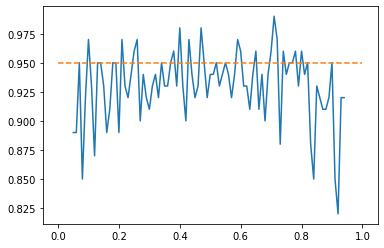

In [6]:
plot_Y = []
for p in p_array:
    success = 0
    for _ in range(N_exp):
        X = np.random.binomial(n, p)
        left, right = (proportion_confint(X, n))
        if left <= p <= right:
            success += 1.0
    plot_Y.append(success / N_exp)
plt.plot(p_array, plot_Y)
plt.plot([0,1], [0.95, 0.95], ls='--')

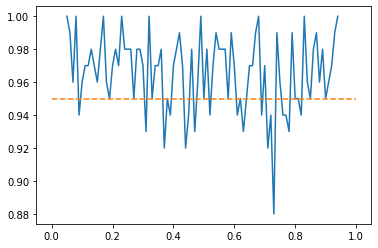

In [7]:
plot_Y = []
for p in p_array:
    success = 0
    for _ in range(N_exp):
        X = np.random.binomial(n, p)        
        left, right = (proportion_confint(X, n, method='beta'))
        if left <= p <= right:
            success += 1
    plot_Y.append(success / N_exp)
plt.plot(p_array, plot_Y)
plt.plot([0,1], [0.95, 0.95], ls='--')

# Бонд, продолжение

Пусть Бонд выбрал взболтанный мартини в 12 случаев из 16.

Требуется:
1. Проверить гипотезу о равнозначности мартини методами ```binom_test```, ```proportions_chisquare```, 
```proportions_ztest```.


2. Провести симуляцию, построить зависимость pow от истинного значения p для выборок мощностью 5, 10, 20, 100, 1000 для разных методов.

3. Провести симуляцию, построить зависимость ошибки первого рода от проверяемого значения $p_0$ при истинном значении p=0.5 для разных методов и мощностей выборки.

In [ ]:
from statsmodels.stats.proportion import binom_test, proportions_ztest, proportions_chisquare

In [ ]:
# ваш код